Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import nltk
from matplotlib.pyplot import plot
from nltk.probability import FreqDist
from nltk.corpus import stopwords 
from lexical_diversity import lex_div
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Maha
[nltk_data]     Vajeeshwaran\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Load each episode file into different daataframes

In [2]:
swe4 = pd.read_csv('SW_EpisodeIV.txt',delim_whitespace=True,names=["index","character","dialogue"],
                   skiprows=1,on_bad_lines='skip',index_col=0)
swe5 = pd.read_csv('SW_EpisodeV.txt',delim_whitespace=True,names=["index","character","dialogue"],
                   skiprows=1,on_bad_lines='skip',index_col=0)
swe6 = pd.read_csv('SW_EpisodeVI.txt',delim_whitespace=True,names=["index","character","dialogue"],
                   skiprows=1,on_bad_lines='skip',index_col=0)

# Task 1

Question : Find the characters with the most dialogues in each episode of The Original 
Trilogy (Episodes IV, V, VI).

In [3]:
print('Top 5 Characters with most dialogues in Episode 4')
top_5_e4 = pd.DataFrame(swe4['character'].value_counts().head(5))
top_5_e4

Top 5 Characters with most dialogues in Episode 4


,character
LUKE,254
HAN,153
THREEPIO,118
BEN,82
LEIA,57


In [4]:
print('Top 5 Characters with most dialogues in Episode 5')
top_5_e5 = pd.DataFrame(swe5['character'].value_counts().head(5))
top_5_e5

Top 5 Characters with most dialogues in Episode 5


,character
HAN,181
LUKE,128
LEIA,114
THREEPIO,92
LANDO,61


In [5]:
print('Top 5 Characters with most dialogues in Episode 6')
top_5_e6 = pd.DataFrame(swe6['character'].value_counts().head(5))
top_5_e6


Top 5 Characters with most dialogues in Episode 6


,character
HAN,124
LUKE,112
THREEPIO,89
LEIA,55
VADER,43


# Task 2

Question : Plot the number of dialogues according to the character for each episode (i.e. 
plot the above findings).

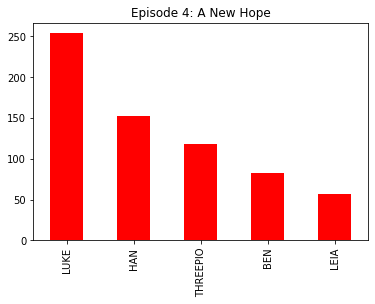

In [6]:
plot1 = top_5_e4.plot(kind = 'bar',color = 'Red')
plot1.set_title('Episode 4: A New Hope')
plot1.legend().remove()

Luke has the highest number of dialogues in episode 4

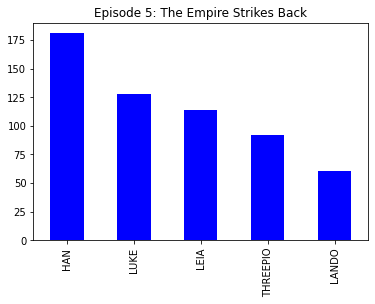

In [7]:
plot2 = top_5_e5.plot(kind = 'bar',color = 'Blue')
plot2.set_title('Episode 5: The Empire Strikes Back')
plot2.legend().remove()

Han has the highest dialogues in episode 5

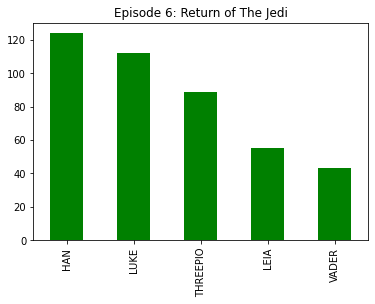

In [8]:
plot3 = top_5_e6.plot(kind = 'bar',color= 'Green')
plot3.set_title('Episode 6: Return of The Jedi')
plot3.legend().remove()

Han has the highest dialogues in episode 6

# Task 3

Question : Add a new column “episode” to the three datasets (to distinguish between the three
episodes) and concatenate them into one dataset

In [9]:
swe4['episode'] = 'episode4'
swe5['episode'] = 'episode5'
swe6['episode'] = 'episode6'
swe_data = pd.concat([swe4,swe5,swe6],axis = 0)
swe_data

,character,dialogue,episode
index,,,
1,THREEPIO,Did you hear that? They've shut down the main...,episode4
2,THREEPIO,We're doomed!,episode4
3,THREEPIO,There'll be no escape for the Princess this time.,episode4
4,THREEPIO,What's that?,episode4
5,THREEPIO,I should have known better than to trust the l...,episode4
...,...,...,...
670,LANDO,"Wedge, I don't think we're going to make it.",episode6
671,WEDGE,You'll make it. Just follow me Gold Leader.,episode6
672,LANDO,I promised to return his ship without a scratc...,episode6


# Task 4

Question : Discover the frequency distribution of words in The Original Trilogy.

In [10]:
dialogues_freq_dist = FreqDist(swe_data.dialogue)
dialogues_freq_dist.most_common(5)

[('Yes, sir.', 9), ('What?', 8), ('Yes.', 6), ('Yes, my lord.', 6), ('No!', 5)]

Displayed 5 top most repeated dialogues in all episodes together

In [11]:
words_list =[]
for dialogue in swe_data.dialogue:
    words_list += nltk.word_tokenize(dialogue)
words_freq_dist = FreqDist(words_list)
words_freq_dist.most_common(30)

[('.', 2947),
 (',', 1500),
 ('I', 981),
 ('!', 849),
 ('you', 808),
 ('the', 799),
 ('to', 642),
 ('?', 541),
 ("'s", 432),
 ('a', 415),
 ("n't", 389),
 ('...', 348),
 ('of', 345),
 ('it', 308),
 ('is', 277),
 ('be', 244),
 ('You', 244),
 ('your', 243),
 ('in', 233),
 ('do', 231),
 ('on', 228),
 ('have', 218),
 ('that', 216),
 ('me', 214),
 ("'re", 210),
 ('this', 197),
 ('and', 191),
 ('for', 190),
 ("'m", 171),
 ('are', 170)]

Displayed 30 top most repeated words in all episodes together

# Task 5

Question : Create a Frequency Distribution plot of the most repeated words in The Original Trilogy.

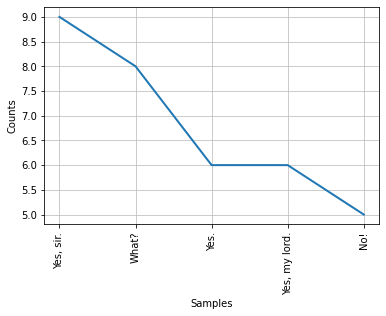

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [12]:
freq_plot = dialogues_freq_dist.plot(5)
freq_plot

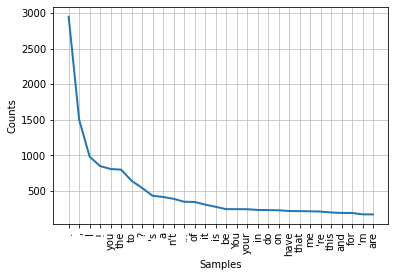

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [13]:
words_freq_plot = words_freq_dist.plot(30)
words_freq_plot

# Task 6

Question : Perform text-mining operations to prepare your dataset for further text analysis. (Use the NLTK library)
    
a. Convert to lower case, word tokenization, removing stopwords, lexicon normalization (lemmatization), etc.

b. Add the resulting array list to the dataset as a new column, “new_script”.

In [14]:
stop_words = set(stopwords.words('english')) 

In [15]:
cleansed_dialogue = []
for dialogue in swe_data.dialogue:
    dialogue = dialogue.lower()
    dialogue = lex_div.flemmatize(dialogue,)
    dialogue = [word for word in dialogue if word not in stop_words]
    cleansed_dialogue.append(dialogue)
swe_data['new_script'] = cleansed_dialogue
swe_data

,character,dialogue,episode,new_script
index,,,,
1,THREEPIO,Did you hear that? They've shut down the main...,episode4,"[hear, theyve, shut, main, reactor, well, dest..."
2,THREEPIO,We're doomed!,episode4,[doom]
3,THREEPIO,There'll be no escape for the Princess this time.,episode4,"[therell, escape, princess, time]"
4,THREEPIO,What's that?,episode4,[whats]
5,THREEPIO,I should have known better than to trust the l...,episode4,"[know, better, trust, logic, halfsized, thermo..."
...,...,...,...,...
670,LANDO,"Wedge, I don't think we're going to make it.",episode6,"[wedge, dont, think, go, make]"
671,WEDGE,You'll make it. Just follow me Gold Leader.,episode6,"[youll, make, follow, gold, leader]"
672,LANDO,I promised to return his ship without a scratc...,episode6,"[promise, return, ship, without, scratchi, sur..."


# Task 7

Question : Repeat steps 4 & 5, but check the frequency distribution of the “new_script” this time.

In [16]:
words_list_cleansed = sum(cleansed_dialogue,[])

In [17]:
words_freq_dist_new = FreqDist(words_list_cleansed)
words_freq_dist_new.most_common(20)

[('get', 227),
 ('go', 222),
 ('dont', 180),
 ('im', 168),
 ('know', 131),
 ('luke', 125),
 ('come', 122),
 ('well', 121),
 ('right', 113),
 ('oh', 109),
 ('see', 103),
 ('sir', 89),
 ('youre', 88),
 ('take', 88),
 ('us', 83),
 ('artoo', 80),
 ('look', 79),
 ('good', 79),
 ('yes', 75),
 ('ship', 74)]

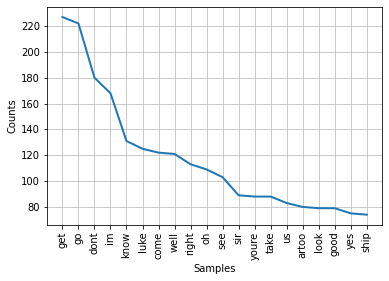

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [18]:
freq_plot_new = words_freq_dist_new.plot(20)
freq_plot_new

# Task 8

Question : Use Word Clouds to visually represent the most repeated words for Darth Vader and Yoda. 

(Use the provided word cloud masks, make a single word cloud for each character.)

In [19]:
vader_data = swe_data[swe_data['character'] == 'VADER']
yoda_data = swe_data[swe_data['character'] == 'YODA']

In [20]:
vader_words = sum(vader_data.new_script,[])
yoda_words = sum(yoda_data.new_script,[])

In [21]:
mask_vader = np.array(Image.open(r"vader.jpg"))
mask_yoda = np.array(Image.open(r"yoda.png"))

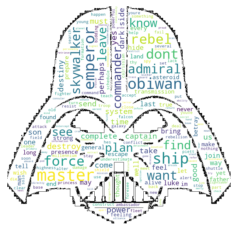

In [22]:
plt.figsize=(15,15)
wordcloud_vader = WordCloud(mask=mask_vader, background_color="white", contour_width=1, contour_color="black")
wordcloud_vader.generate(" ".join(str(x) for x in vader_words))
plt.imshow(wordcloud_vader,interpolation = 'bilinear')
plt.axis('off')
plt.show()

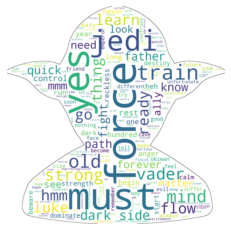

In [23]:
plt.figsize=(15,15)
wordcloud_yoda = WordCloud(mask=mask_yoda, background_color="white", contour_width=1, contour_color="black")
wordcloud_yoda.generate(" ".join(str(x) for x in yoda_words))
plt.imshow(wordcloud_yoda,interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Task 9

Question : Discover the most relevant words in The Original Trilogy script.

The TF-IDF model contains information on the more important and less important words (relevance).

In [24]:
script = " ".join(dialogue for dialogue in swe_data['dialogue'])
script

"Did you hear that?  They've shut down the main reactor.  We'll be destroyed for sure.  This is madness! We're doomed! There'll be no escape for the Princess this time. What's that? I should have known better than to trust the logic of a half-sized thermocapsulary dehousing assister... Hurry up!  Come with me!  What are you waiting for?!  Get in gear! Artoo! Artoo-Detoo, where are you? At last!  Where have you been? They're heading in this direction. What are we going to do?  We'll be sent to the spice mines of Kessel or smashed into who knows what! Wait a minute, where are you going? The Death Star plans are not in the main computer. Where are those transmissions you intercepted? We intercepted no transmissions. Aaah...  This is a consular ship. Were on a diplomatic mission. If this is a consular ship... where is the Ambassador? Commander, tear this ship apart until you've found those plans and bring me the Ambassador.  I want her alive! There she is! Set for stun! She'll be all right

In [25]:
tfidf_vectorizer=TfidfVectorizer(use_idf=True, analyzer='word', stop_words= 'english') 

In [26]:
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform([script])

In [27]:
df = pd.DataFrame(tfidf_vectorizer_vectors[0].T.todense(),  index=tfidf_vectorizer.get_feature_names(), \
                  columns=["Importance Score"]) 

C:\Users\Maha Vajeeshwaran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [28]:
df.sort_values(by=["Importance Score"],ascending=False).head(10)

,Importance Score
don,0.311706
ll,0.266931
luke,0.235932
going,0.208378
oh,0.194601
right,0.194601
ve,0.192879
come,0.189435
know,0.180824
sir,0.154992


In [29]:
df.sort_values(by=["Importance Score"],ascending=True).head(10)

,Importance Score
0300,0.001722
rim,0.001722
frankly,0.001722
fragment,0.001722
foul,0.001722
rise,0.001722
fossil,0.001722
risking,0.001722
riled,0.001722
fortune,0.001722


# Task 10

Question : Perform sentiment analysis on the movie scripts.

In [30]:
sa = SentimentIntensityAnalyzer()

In [31]:
swe_data['p_scores'] = swe_data['new_script'].apply(lambda dialogue:sa.polarity_scores(' '.join(a for a in dialogue)))
swe_data

,character,dialogue,episode,new_script,p_scores
index,,,,,
1,THREEPIO,Did you hear that? They've shut down the main...,episode4,"[hear, theyve, shut, main, reactor, well, dest...","{'neg': 0.405, 'neu': 0.316, 'pos': 0.278, 'co..."
2,THREEPIO,We're doomed!,episode4,[doom],"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound..."
3,THREEPIO,There'll be no escape for the Princess this time.,episode4,"[therell, escape, princess, time]","{'neg': 0.0, 'neu': 0.638, 'pos': 0.362, 'comp..."
4,THREEPIO,What's that?,episode4,[whats],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
5,THREEPIO,I should have known better than to trust the l...,episode4,"[know, better, trust, logic, halfsized, thermo...","{'neg': 0.0, 'neu': 0.492, 'pos': 0.508, 'comp..."
...,...,...,...,...,...
670,LANDO,"Wedge, I don't think we're going to make it.",episode6,"[wedge, dont, think, go, make]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
671,WEDGE,You'll make it. Just follow me Gold Leader.,episode6,"[youll, make, follow, gold, leader]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
672,LANDO,I promised to return his ship without a scratc...,episode6,"[promise, return, ship, without, scratchi, sur...","{'neg': 0.296, 'neu': 0.406, 'pos': 0.298, 'co..."


In [32]:
swe_data['c_score']  = swe_data['p_scores'].apply(lambda score_dict: score_dict['compound'])
swe_data

,character,dialogue,episode,new_script,p_scores,c_score
index,,,,,,
1,THREEPIO,Did you hear that? They've shut down the main...,episode4,"[hear, theyve, shut, main, reactor, well, dest...","{'neg': 0.405, 'neu': 0.316, 'pos': 0.278, 'co...",-0.4588
2,THREEPIO,We're doomed!,episode4,[doom],"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",-0.4019
3,THREEPIO,There'll be no escape for the Princess this time.,episode4,"[therell, escape, princess, time]","{'neg': 0.0, 'neu': 0.638, 'pos': 0.362, 'comp...",0.1779
4,THREEPIO,What's that?,episode4,[whats],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
5,THREEPIO,I should have known better than to trust the l...,episode4,"[know, better, trust, logic, halfsized, thermo...","{'neg': 0.0, 'neu': 0.492, 'pos': 0.508, 'comp...",0.7351
...,...,...,...,...,...,...
670,LANDO,"Wedge, I don't think we're going to make it.",episode6,"[wedge, dont, think, go, make]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
671,WEDGE,You'll make it. Just follow me Gold Leader.,episode6,"[youll, make, follow, gold, leader]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
672,LANDO,I promised to return his ship without a scratc...,episode6,"[promise, return, ship, without, scratchi, sur...","{'neg': 0.296, 'neu': 0.406, 'pos': 0.298, 'co...",0.0083


In [33]:
swe_data['compound'] = swe_data['c_score'].apply(lambda c: 'negative' if c < 0 else 'positive')
swe_data

,character,dialogue,episode,new_script,p_scores,c_score,compound
index,,,,,,,
1,THREEPIO,Did you hear that? They've shut down the main...,episode4,"[hear, theyve, shut, main, reactor, well, dest...","{'neg': 0.405, 'neu': 0.316, 'pos': 0.278, 'co...",-0.4588,negative
2,THREEPIO,We're doomed!,episode4,[doom],"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",-0.4019,negative
3,THREEPIO,There'll be no escape for the Princess this time.,episode4,"[therell, escape, princess, time]","{'neg': 0.0, 'neu': 0.638, 'pos': 0.362, 'comp...",0.1779,positive
4,THREEPIO,What's that?,episode4,[whats],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,positive
5,THREEPIO,I should have known better than to trust the l...,episode4,"[know, better, trust, logic, halfsized, thermo...","{'neg': 0.0, 'neu': 0.492, 'pos': 0.508, 'comp...",0.7351,positive
...,...,...,...,...,...,...,...
670,LANDO,"Wedge, I don't think we're going to make it.",episode6,"[wedge, dont, think, go, make]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,positive
671,WEDGE,You'll make it. Just follow me Gold Leader.,episode6,"[youll, make, follow, gold, leader]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,positive
672,LANDO,I promised to return his ship without a scratc...,episode6,"[promise, return, ship, without, scratchi, sur...","{'neg': 0.296, 'neu': 0.406, 'pos': 0.298, 'co...",0.0083,positive


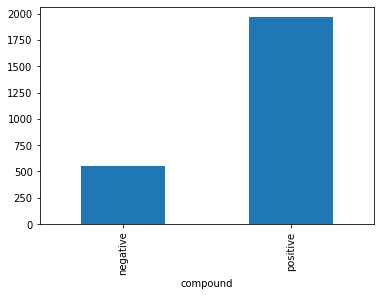

In [34]:
swe_data.groupby("compound")["compound"].count().plot(kind="bar");

<AxesSubplot:title={'center':'LUKE'}, ylabel='compound'>

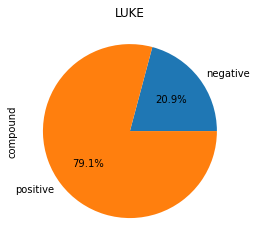

In [35]:
luke_sa = swe_data[(swe_data["character"] == 'LUKE')].groupby("compound")["compound"].count()
luke_sa.plot(kind="pie", autopct="%1.1f%%", title="LUKE")

Luke spoke 79% of positive words and 21% of negative words.

<AxesSubplot:title={'center':'HAN'}, ylabel='compound'>

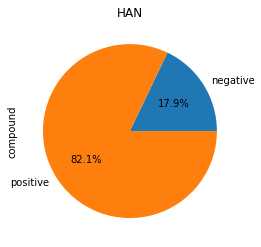

In [36]:
han_sa = swe_data[(swe_data["character"] == 'HAN')].groupby("compound")["compound"].count()
han_sa.plot(kind="pie", autopct="%1.1f%%", title="HAN")

Han spoke 82% of positive words and 18% of negative words.

<AxesSubplot:title={'center':'VADER'}, ylabel='compound'>

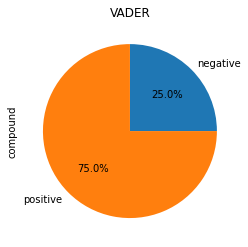

In [37]:
vader_sa = swe_data[(swe_data["character"] == 'VADER')].groupby("compound")["compound"].count()
vader_sa.plot(kind="pie", autopct="%1.1f%%", title="VADER")

Vader spoke 75% of positive words and 25% of negative words.

<AxesSubplot:title={'center':'YODA'}, ylabel='compound'>

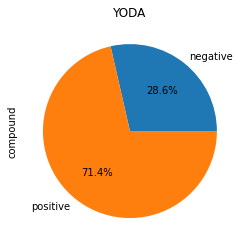

In [38]:
yoda_sa = swe_data[(swe_data["character"] == 'YODA')].groupby("compound")["compound"].count()
yoda_sa.plot(kind="pie", autopct="%1.1f%%", title="YODA")

Yoda spoke 71% of positive words and 29% of negative words.